In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import plot_tree

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from itertools import product
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load data

In [2]:
df = pd.read_csv('../data/processed.csv')

In [3]:
df

,Institution,Course,actor.id,timestamp,verb.id,object.definition.type,result.score.scaled,result.success,result.completion,Teaching
0,UEF,Advanced Data Management Systems,0,2023-07-07 18:55:47,viewed,course,NaN,False,False,Flipped classroom
1,UEF,Advanced Data Management Systems,0,2023-07-07 15:21:18,viewed,link,NaN,False,False,Flipped classroom
2,UEF,Advanced Data Management Systems,0,2023-07-07 15:08:13,viewed,link,NaN,False,False,Flipped classroom
3,UEF,Advanced Data Management Systems,0,2023-07-07 15:08:10,viewed,course,NaN,False,False,Flipped classroom
4,UEF,Advanced Data Management Systems,0,2023-07-07 09:03:32,viewed,course,NaN,False,False,Flipped classroom
...,...,...,...,...,...,...,...,...,...,...
299286,BMU,Computer Networks,820,2023-06-11 22:57:27,answered,cmi.interaction,1.000,True,True,Flipped classroom
299287,BMU,Computer Networks,799,2023-05-16 00:05:45,answered,cmi.interaction,0.000,False,True,Flipped classroom
299288,BMU,Computer Networks,788,2023-05-12 22:10:50,completed,assessment,0.375,True,True,Flipped classroom
299289,BMU,Computer Networks,788,2023-02-27 22:45:33,completed,module,NaN,False,False,Flipped classroom


# Classification preprocess

In [4]:
df_object_by_actor = df.groupby('actor.id')['object.definition.type'].value_counts().unstack(fill_value=0).stack().reset_index()

In [5]:
df_object_by_actor

,actor.id,object.definition.type,0
0,0,assessment,0
1,0,attempt,0
2,0,cmi.interaction,0
3,0,course,4
4,0,discussion,0
...,...,...,...
12430,828,page,0
12431,828,quiz,2
12432,828,resource,0
12433,828,review,0


In [6]:
df_object_by_actor = pd.concat([
     pd.Series(v.values, name=k) for k, v in df_object_by_actor.groupby('object.definition.type')[0]
    ], 
    axis=1
)

In [7]:
df_object_by_actor

,assessment,attempt,cmi.interaction,course,discussion,forum-topic,lesson,link,meeting,module,page,quiz,resource,review,survey
0,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0
1,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
2,23,9,0,379,1,1,0,46,0,0,0,0,5,0,0
3,51,13,80,49,0,0,0,41,0,14,0,0,6,12,0
4,30,4,10,116,0,0,0,54,0,6,0,0,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,28,0,44,0,0,0,0,0,0,9,0,10,0,0,0
825,26,0,44,0,0,0,0,0,0,8,0,10,0,0,0
826,4,0,6,0,0,0,0,0,0,1,0,2,0,0,0
827,4,0,16,0,0,0,0,0,0,0,0,4,0,0,0


In [8]:
df

,Institution,Course,actor.id,timestamp,verb.id,object.definition.type,result.score.scaled,result.success,result.completion,Teaching
0,UEF,Advanced Data Management Systems,0,2023-07-07 18:55:47,viewed,course,NaN,False,False,Flipped classroom
1,UEF,Advanced Data Management Systems,0,2023-07-07 15:21:18,viewed,link,NaN,False,False,Flipped classroom
2,UEF,Advanced Data Management Systems,0,2023-07-07 15:08:13,viewed,link,NaN,False,False,Flipped classroom
3,UEF,Advanced Data Management Systems,0,2023-07-07 15:08:10,viewed,course,NaN,False,False,Flipped classroom
4,UEF,Advanced Data Management Systems,0,2023-07-07 09:03:32,viewed,course,NaN,False,False,Flipped classroom
...,...,...,...,...,...,...,...,...,...,...
299286,BMU,Computer Networks,820,2023-06-11 22:57:27,answered,cmi.interaction,1.000,True,True,Flipped classroom
299287,BMU,Computer Networks,799,2023-05-16 00:05:45,answered,cmi.interaction,0.000,False,True,Flipped classroom
299288,BMU,Computer Networks,788,2023-05-12 22:10:50,completed,assessment,0.375,True,True,Flipped classroom
299289,BMU,Computer Networks,788,2023-02-27 22:45:33,completed,module,NaN,False,False,Flipped classroom


In [9]:
df['Course'].value_counts(normalize=True)

Course
Human Factors of Interactive Technology    0.450582
Computer Architecture                      0.247625
e-Learning                                 0.088693
Web Applications                           0.069160
Advanced Data Management Systems           0.061596
Human-computer interaction                 0.052705
Computer Organization                      0.017585
Computer Networks                          0.012055
Name: proportion, dtype: float64

In [10]:
score_series = df.groupby('actor.id')['result.score.scaled'].mean()

In [11]:
df = pd.concat([
    df[['actor.id', 'Course']].groupby('actor.id').max(), 
    df_object_by_actor,
    score_series
], axis=1)
df

,Course,assessment,attempt,cmi.interaction,course,discussion,forum-topic,lesson,link,meeting,module,page,quiz,resource,review,survey,result.score.scaled
0,Advanced Data Management Systems,0,0,0,4,0,0,0,2,0,0,0,0,0,0,0,NaN
1,Advanced Data Management Systems,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,NaN
2,Advanced Data Management Systems,23,9,0,379,1,1,0,46,0,0,0,0,5,0,0,NaN
3,Advanced Data Management Systems,51,13,80,49,0,0,0,41,0,14,0,0,6,12,0,0.947059
4,Advanced Data Management Systems,30,4,10,116,0,0,0,54,0,6,0,0,5,2,0,0.842000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,Computer Networks,28,0,44,0,0,0,0,0,0,9,0,10,0,0,0,0.691810
825,Computer Networks,26,0,44,0,0,0,0,0,0,8,0,10,0,0,0,0.772076
826,Computer Networks,4,0,6,0,0,0,0,0,0,1,0,2,0,0,0,0.357143
827,Computer Networks,4,0,16,0,0,0,0,0,0,0,0,4,0,0,0,0.935294


In [12]:
df.describe()

,assessment,attempt,cmi.interaction,course,discussion,forum-topic,lesson,link,meeting,module,page,quiz,resource,review,survey,result.score.scaled
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,763.000000
mean,24.510253,17.791315,40.465621,123.862485,30.230398,14.195416,0.007238,12.401689,0.237636,28.755127,3.089264,25.431846,37.141134,2.800965,0.106152,0.786952
std,21.615412,31.873446,39.085134,226.134259,78.176153,26.662689,0.155249,19.852939,1.546457,47.042807,5.668946,64.136172,47.217025,4.328336,0.453993,0.260776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.740000
50%,17.000000,0.000000,35.000000,91.000000,0.000000,1.000000,0.000000,3.000000,0.000000,16.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.868750
75%,43.000000,23.000000,66.000000,167.000000,35.000000,22.000000,0.000000,16.000000,0.000000,42.000000,5.000000,10.000000,54.000000,6.000000,0.000000,0.967500
max,95.000000,157.000000,216.000000,5477.000000,1315.000000,271.000000,4.000000,133.000000,21.000000,1100.000000,63.000000,427.000000,377.000000,30.000000,5.000000,1.000000


In [13]:
df = df.loc[df['result.score.scaled'].notnull()].reset_index()
df = df.drop('index', axis=1)

In [14]:
df

,Course,assessment,attempt,cmi.interaction,course,discussion,forum-topic,lesson,link,meeting,module,page,quiz,resource,review,survey,result.score.scaled
0,Advanced Data Management Systems,51,13,80,49,0,0,0,41,0,14,0,0,6,12,0,0.947059
1,Advanced Data Management Systems,30,4,10,116,0,0,0,54,0,6,0,0,5,2,0,0.842000
2,Advanced Data Management Systems,47,11,0,251,2,1,0,54,0,15,0,0,6,7,0,0.966250
3,Advanced Data Management Systems,53,7,65,162,0,2,0,53,0,15,0,0,8,7,0,0.926667
4,Advanced Data Management Systems,46,8,60,56,0,0,0,24,0,8,0,0,5,9,0,0.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Computer Networks,28,0,44,0,0,0,0,0,0,9,0,10,0,0,0,0.691810
759,Computer Networks,26,0,44,0,0,0,0,0,0,8,0,10,0,0,0,0.772076
760,Computer Networks,4,0,6,0,0,0,0,0,0,1,0,2,0,0,0,0.357143
761,Computer Networks,4,0,16,0,0,0,0,0,0,0,0,4,0,0,0,0.935294


# Classification

In [15]:
X = df.drop('Course', axis=1)
y = df['Course']

In [16]:
X_columns = X.columns.tolist()
X_columns

['assessment',
 'attempt',
 'cmi.interaction',
 'course',
 'discussion',
 'forum-topic',
 'lesson',
 'link',
 'meeting',
 'module',
 'page',
 'quiz',
 'resource',
 'review',
 'survey',
 'result.score.scaled']

In [17]:
X

,assessment,attempt,cmi.interaction,course,discussion,forum-topic,lesson,link,meeting,module,page,quiz,resource,review,survey,result.score.scaled
0,51,13,80,49,0,0,0,41,0,14,0,0,6,12,0,0.947059
1,30,4,10,116,0,0,0,54,0,6,0,0,5,2,0,0.842000
2,47,11,0,251,2,1,0,54,0,15,0,0,6,7,0,0.966250
3,53,7,65,162,0,2,0,53,0,15,0,0,8,7,0,0.926667
4,46,8,60,56,0,0,0,24,0,8,0,0,5,9,0,0.971429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,28,0,44,0,0,0,0,0,0,9,0,10,0,0,0,0.691810
759,26,0,44,0,0,0,0,0,0,8,0,10,0,0,0,0.772076
760,4,0,6,0,0,0,0,0,0,1,0,2,0,0,0,0.357143
761,4,0,16,0,0,0,0,0,0,0,0,4,0,0,0,0.935294


In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[ 1.1505121 , -0.19219384,  0.92919054, ...,  2.04124256,
        -0.24222052,  0.61436648],
       [ 0.16507053, -0.46686505, -0.87586026, ..., -0.23210158,
        -0.24222052,  0.211233  ],
       [ 0.96280895, -0.25323189, -1.13372466, ...,  0.90457049,
        -0.24222052,  0.68800718],
       ...,
       [-1.05499998, -0.58894114, -0.97900602, ..., -0.68677041,
        -0.24222052, -1.64926896],
       [-1.05499998, -0.58894114, -0.72114162, ..., -0.68677041,
        -0.24222052,  0.56922275],
       [-1.14885156, -0.58894114, -0.97900602, ..., -0.68677041,
        -0.24222052, -1.10109513]])

In [20]:
y

0      Advanced Data Management Systems
1      Advanced Data Management Systems
2      Advanced Data Management Systems
3      Advanced Data Management Systems
4      Advanced Data Management Systems
                     ...               
758                   Computer Networks
759                   Computer Networks
760                   Computer Networks
761                   Computer Networks
762                   Computer Networks
Name: Course, Length: 763, dtype: object

In [21]:
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y.tolist())

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Logistic Regression

In [24]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

print("Train score:", model.score(X_train, y_train))
print("Test score: ", model.score(X_test, y_test))

Train score: 0.9344262295081968
Test score:  0.9019607843137255


In [25]:
y_pred = model.predict(X_test)

<Axes: >

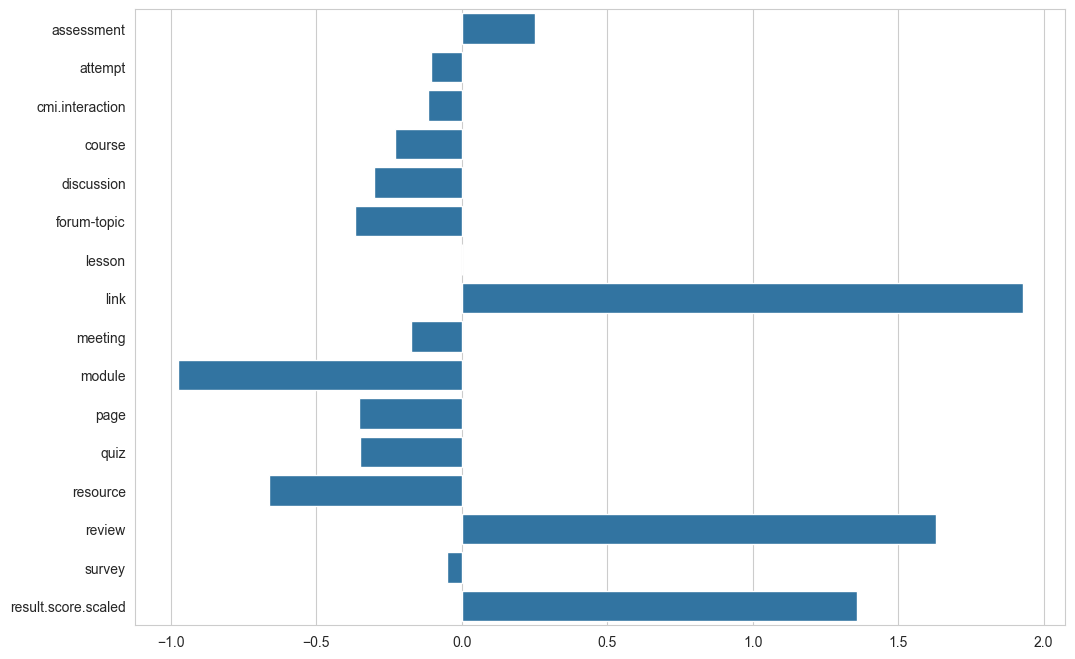

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x=model.coef_[0], y=X_columns, orient='horizontal')

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.9019607843137255

In [28]:
f1_score(y_test, y_pred, average='macro')

0.8602388770062286

In [29]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(8)]))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       1.00      0.87      0.93        15
           2       0.67      0.57      0.62         7
           3       0.81      0.72      0.76        18
           4       1.00      1.00      1.00        48
           5       0.76      1.00      0.86        25
           6       0.87      1.00      0.93        13
           7       1.00      1.00      1.00        13

    accuracy                           0.90       153
   macro avg       0.89      0.85      0.86       153
weighted avg       0.91      0.90      0.90       153


In [30]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,9,0,0,0,0,5,0,0
1,0,13,0,0,0,0,2,0
2,0,0,4,3,0,0,0,0
3,0,0,2,13,0,3,0,0
4,0,0,0,0,48,0,0,0
5,0,0,0,0,0,25,0,0
6,0,0,0,0,0,0,13,0
7,0,0,0,0,0,0,0,13


## k-NN

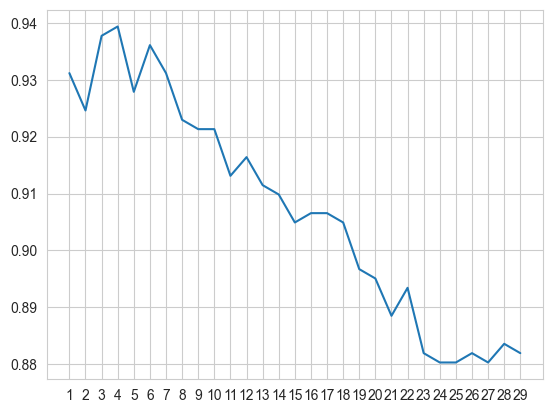

Best N value: 4


In [31]:
model = None
best_score = -1
scores = {}

for n in range(1, 30):
    current_model = KNeighborsClassifier(n)
    cv_scores = cross_val_score(current_model, X_train, y_train, cv=5)
    score = np.mean(cv_scores) 
    
    if score > best_score:
        best_score = score
        model = current_model

    scores[str(n)] = score

plt.plot(list(scores.keys()), list(scores.values()))
plt.show()
print('Best N value: ' + str(model.get_params()['n_neighbors']))

In [32]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [33]:
y_pred = model.predict(X_test)

In [34]:
metrics.accuracy_score(y_test, y_pred)

0.9019607843137255

In [35]:
f1_score(y_test, y_pred, average='macro')

0.8659257035999517

In [36]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(8)]))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       1.00      0.93      0.97        15
           2       0.45      0.71      0.56         7
           3       0.83      0.56      0.67        18
           4       1.00      0.96      0.98        48
           5       0.83      1.00      0.91        25
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00        13

    accuracy                           0.90       153
   macro avg       0.87      0.88      0.87       153
weighted avg       0.92      0.90      0.90       153


In [37]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,12,0,0,0,0,2,0,0
1,0,14,0,0,0,0,1,0
2,0,0,5,2,0,0,0,0
3,0,0,6,10,0,2,0,0
4,1,0,0,0,46,1,0,0
5,0,0,0,0,0,25,0,0
6,0,0,0,0,0,0,13,0
7,0,0,0,0,0,0,0,13


# Decision Tree

In [38]:
criterion = ['gini', 'entropy']
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for f, d, c in product(max_features, max_depths, criterion):
    current_model = DecisionTreeClassifier(criterion=c, max_features=f, max_depth=d)
    cv_scores = cross_val_score(current_model, X_train, y_train, cv=5)
    score = np.mean(cv_scores)

    if f1_score(y_test, y_pred, average='macro') > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred, average='macro')

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_features=1)

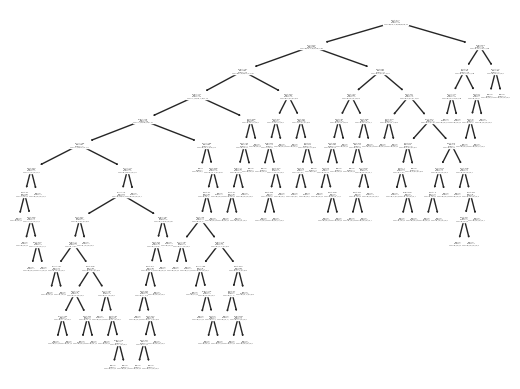

In [40]:
plot_tree(model)
plt.show()

In [41]:
best_score

0.8659257035999517

In [42]:
y_pred = model.predict(X_test)

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.8888888888888888

In [44]:
f1_score(y_test, y_pred, average='macro')

0.8557741626498578

In [45]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(8)]))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.80      0.80      0.80        15
           2       0.55      0.86      0.67         7
           3       0.85      0.61      0.71        18
           4       1.00      0.94      0.97        48
           5       0.86      1.00      0.93        25
           6       0.93      1.00      0.96        13
           7       1.00      0.85      0.92        13

    accuracy                           0.89       153
   macro avg       0.86      0.87      0.86       153
weighted avg       0.90      0.89      0.89       153


In [46]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,13,0,0,0,0,1,0,0
1,0,12,0,1,0,1,1,0
2,0,0,6,1,0,0,0,0
3,0,0,5,11,0,2,0,0
4,2,1,0,0,45,0,0,0
5,0,0,0,0,0,25,0,0
6,0,0,0,0,0,0,13,0
7,0,2,0,0,0,0,0,11


# Random Forest

In [47]:
criterion = ['gini', 'entropy']
n_estimators = [1, 2, 3, 5, 8, 10, 20, 50, 100, 150, 200]
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 1, 2, 3, 4, 5, 8, 10, 15, 20, 50]

best_score = -1

for n, f, d, c in product(n_estimators, max_features, max_depths, criterion):
    current_model = RandomForestClassifier(n_estimators=n, criterion=c, max_features=f, max_depth=d)
    cv_scores = cross_val_score(current_model, X_train, y_train, cv=5)
    score = np.mean(cv_scores)

    if f1_score(y_test, y_pred, average='macro') > best_score:
        model = current_model
        best_score = f1_score(y_test, y_pred, average='macro')

In [48]:
best_score

0.8557741626498578

In [49]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=1, n_estimators=1)

In [50]:
y_pred = model.predict(X_test)

In [51]:
metrics.accuracy_score(y_test, y_pred)

0.8954248366013072

In [52]:
f1_score(y_test, y_pred, average='macro')

0.8614028310844115

In [53]:
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(8)]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.80      0.89        15
           2       0.62      0.71      0.67         7
           3       0.79      0.83      0.81        18
           4       0.96      0.98      0.97        48
           5       0.92      0.88      0.90        25
           6       0.92      0.92      0.92        13
           7       0.77      0.77      0.77        13

    accuracy                           0.90       153
   macro avg       0.86      0.86      0.86       153
weighted avg       0.90      0.90      0.90       153


In [54]:
pd.crosstab(y_test, y_pred)

col_0,0,1,2,3,4,5,6,7
row_0,,,,,,,,
0,14,0,0,0,0,0,0,0
1,0,12,0,1,0,0,1,1
2,0,0,5,2,0,0,0,0
3,0,0,1,15,0,2,0,0
4,1,0,0,0,47,0,0,0
5,0,0,0,0,2,22,0,1
6,0,0,0,0,0,0,12,1
7,0,0,2,1,0,0,0,10


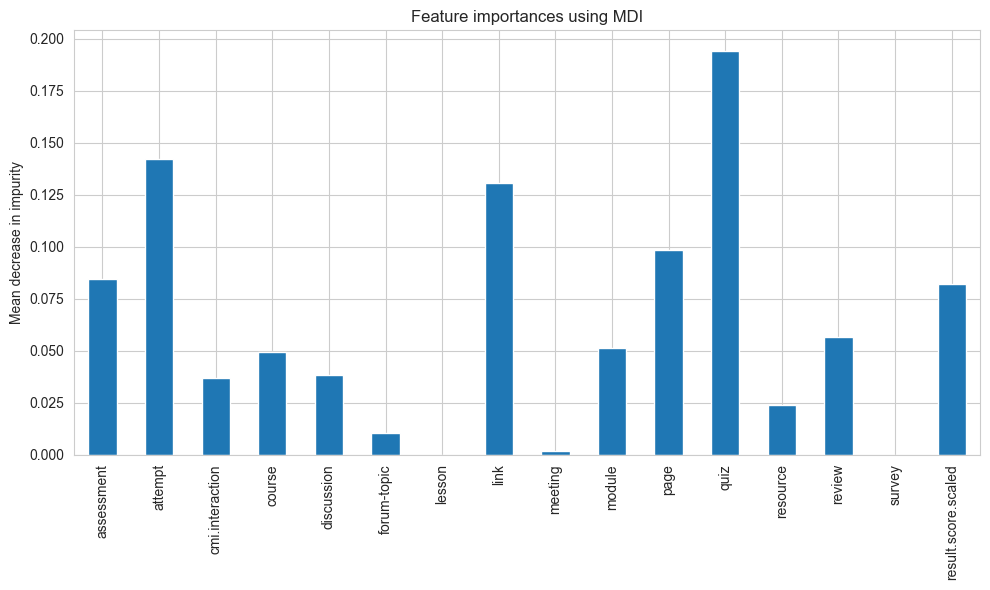

In [55]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_columns)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()